In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from sklearn import preprocessing
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.metrics import (
    confusion_matrix, 
    precision_score, 
    recall_score, 
    roc_auc_score,
    r2_score
)
from sklearn.model_selection import train_test_split, validation_curve

SyntaxError: invalid syntax (4063597104.py, line 13)

In [2]:
df = pd.read_csv("../data/House_Price_mlpython.csv")

### Linear models

In [3]:
df.drop(["parks"], inplace=True, axis=1)

In [5]:
X = sm.add_constant(df["room_num"])

In [7]:
lm = sm.OLS(df["price"], X).fit()

In [9]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     474.3
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           1.31e-74
Time:                        08:08:43   Log-Likelihood:                -1671.6
No. Observations:                 506   AIC:                             3347.
Df Residuals:                     504   BIC:                             3356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6592      2.642    -13.118      0.000     -39.850     -29.468
room_num       9.0997      0.418     21.779      0.000       8.279       9.921
==============================================================================
Omnibus:                      103.753   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              633.429
Skew:                           0.729   Prob(JB):                    2.84e-138
Kurtosis:                       8.284   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5.084275831867604 [0.05328094]


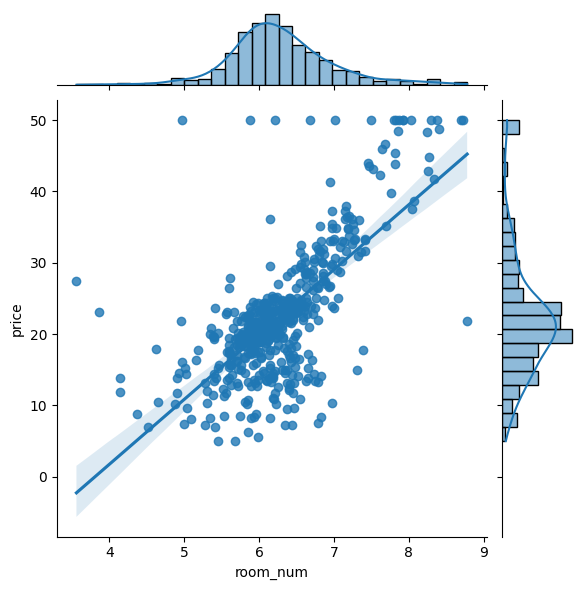

In [12]:
y = df["room_num"]
# sklearn needs to dimension array (n, 2)
X = df[["price"]]

lm2 = LinearRegression()
lm2.fit(X, y)

print(lm2.intercept_, lm2.coef_)

lm2.predict(X)

sns.jointplot(
    x = df["room_num"],
    y = df["price"],
    data = df,
    kind = "reg"
)

### classification models
- Logistic Regression (classification vs linear regression for regression on continuous variable)
- Linear Discriminant Analysis (LDA)
- K-Nearest Neighbors (KNN)

1. prediction question - will the house be sold within three months of getting listed
2. how accurately can we estimate the effect of each of the predictor variables on the response variable

In [14]:
df = pd.read_csv("../data/House_price_preprocessed.csv")

In [15]:
df.head()

,price,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,Sold,avg_dist,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.0,32.31,0.538,6.575,65.2,24.7,4.98,5.480,11.19200,23,0.049347,0,4.0875,1,0,0,1
1,21.6,37.07,0.469,6.421,78.9,22.2,9.14,7.332,12.17280,42,0.046146,1,4.9675,0,1,0,0
2,34.7,37.07,0.469,7.185,61.1,22.2,4.03,7.394,46.19856,38,0.045764,0,4.9675,0,0,0,0
3,33.4,32.18,0.458,6.998,45.8,21.3,2.94,9.268,11.26720,45,0.047151,0,6.0650,1,1,0,0
4,36.2,32.18,0.458,7.147,54.2,21.3,5.33,8.824,11.28960,55,0.039474,0,6.0625,0,1,0,0
